In [17]:
import os, sys
import pandas as pd
import numpy as np
import glob
import math
import collections
import tqdm

import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")

def extract_experiment_info(file):
    
    name = file.split('/')[-1]
    print(name)
    return float(name.split('_')[-1])


In [18]:
def visual_hypertuning_results(path):
    files = glob.glob(os.path.join(path, '*'))
    experiment_lrs = [extract_experiment_info(x) for x in files]
    
    table_huge = []
    for exp, lr in zip(files, experiment_lrs):
        hists = pd.read_csv(os.path.join(exp, 'history.csv'), index_col=0)
        hists['lr'] = lr
        table_huge.append(hists)
        
    print(len(files), files)

    table_huge=pd.concat(table_huge)
    
    for metric in ['auc', 'unexp']:
        g = sns.relplot(
            data=table_huge,
            x="epoch", y=metric, col="phase", 
            hue="lr",
            kind="line", palette="Paired",
            linewidth=2, 
            height=5, 
            aspect=1.2, 
            legend='full',
            facet_kws={'sharey':False}
        )
        
    best_val = table_huge[table_huge.phase=='validation'].groupby(['lr']).max()
    best_val['lr'] = best_val.index
    
    fig, axs = plt.subplots(figsize=(14, 5), ncols=2)
    barlist = axs[0].bar(x = range(len(best_val)), height=best_val.auc, 
                         color= matplotlib.cm.get_cmap('Paired').colors)
    
    axs[0].set_xticks(range(len(best_val)))
    axs[0].set_xticklabels(['%2.2f'%x for x in best_val.index], rotation=30)
    axs[0].set_ylim([0.775, 0.795])
    axs[0].set_ylabel('validation AUC')
    axs[0].set_xlabel('learning rate')

    axs[1].bar(x = range(len(best_val)), height=best_val.unexp,
               color= matplotlib.cm.get_cmap('Paired').colors)
    axs[1].set_xticks(range(len(best_val)))
    axs[1].set_xticklabels( ['%2.2f'%x for x in best_val.index], rotation=30)
    axs[1].set_ylabel('validation unexp')
    axs[1].set_xlabel('learning rate')
    
    return table_huge, best_val

9_lr_0.2845914617588184
7_lr_0.23851743612975013
3_lr_2.5876511704796443
4_lr_0.14599266925772095
8_lr_3.1922020872502994
0_lr_0.44352021966688354
5_lr_5.637832809043802
2_lr_2.929032175502286
6_lr_2.428336682932239
1_lr_0.14415171310230107
10 ['../logs/jester_baseline/9_lr_0.2845914617588184', '../logs/jester_baseline/7_lr_0.23851743612975013', '../logs/jester_baseline/3_lr_2.5876511704796443', '../logs/jester_baseline/4_lr_0.14599266925772095', '../logs/jester_baseline/8_lr_3.1922020872502994', '../logs/jester_baseline/0_lr_0.44352021966688354', '../logs/jester_baseline/5_lr_5.637832809043802', '../logs/jester_baseline/2_lr_2.929032175502286', '../logs/jester_baseline/6_lr_2.428336682932239', '../logs/jester_baseline/1_lr_0.14415171310230107']


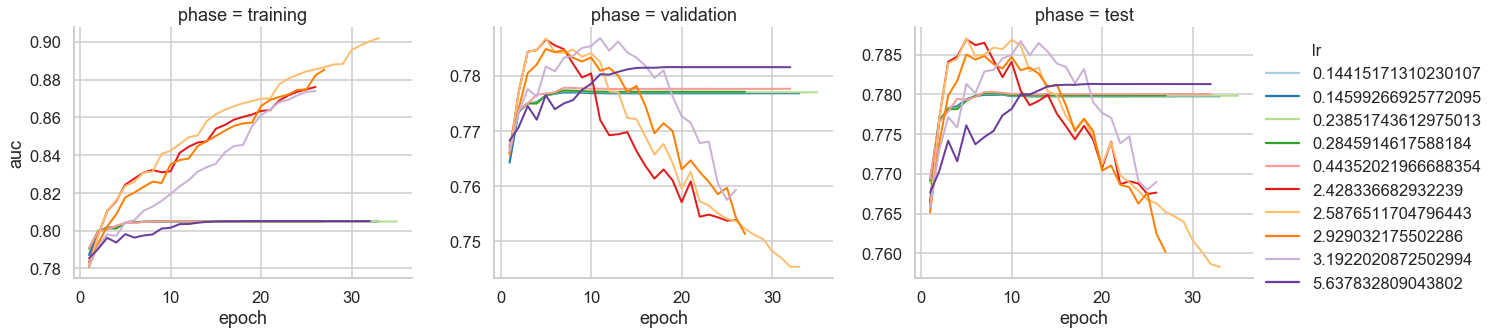

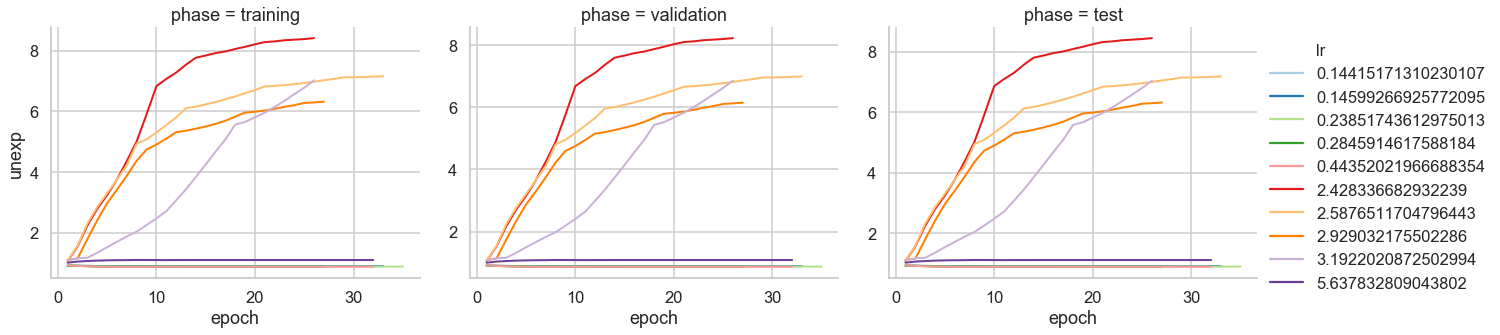

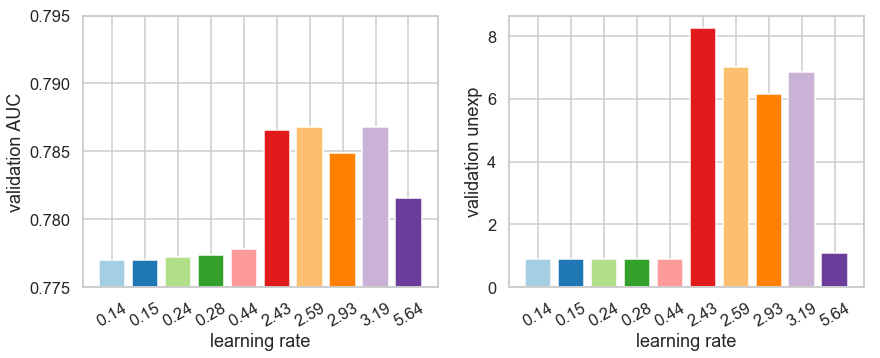

In [20]:
path = '../logs/jester_baseline'
jester_table_huge, jester_val = visual_hypertuning_results(path)

10 ['../logs/jester_meta/9_lr_8.439303759877893', '../logs/jester_meta/1_lr_0.48859398357882583', '../logs/jester_meta/5_lr_2.7362754075731237', '../logs/jester_meta/6_lr_0.3864443287369436', '../logs/jester_meta/8_lr_3.421867455426836', '../logs/jester_meta/4_lr_0.22287074274882818', '../logs/jester_meta/7_lr_3.2323047104066984', '../logs/jester_meta/2_lr_5.079044962347367', '../logs/jester_meta/0_lr_1.4831765853394163', '../logs/jester_meta/3_lr_2.0599523827853643']


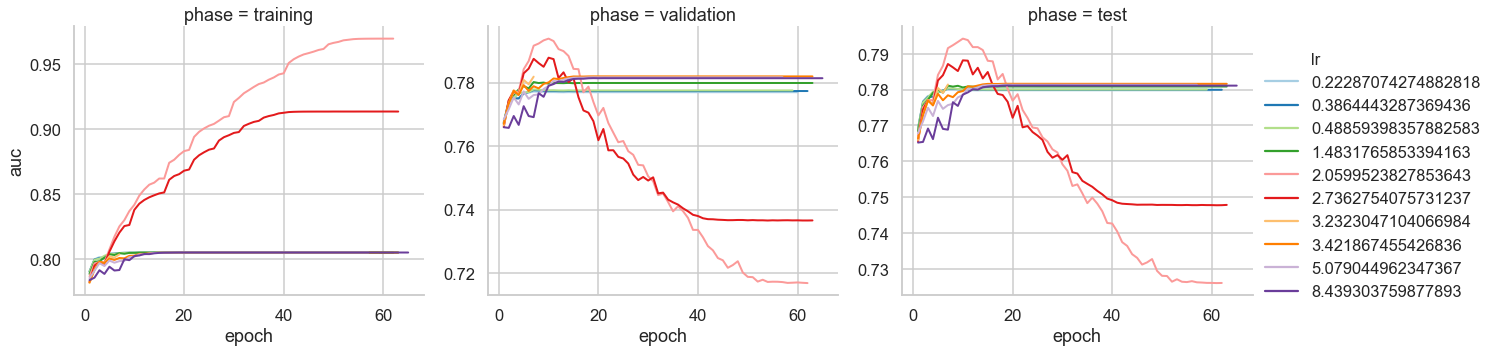

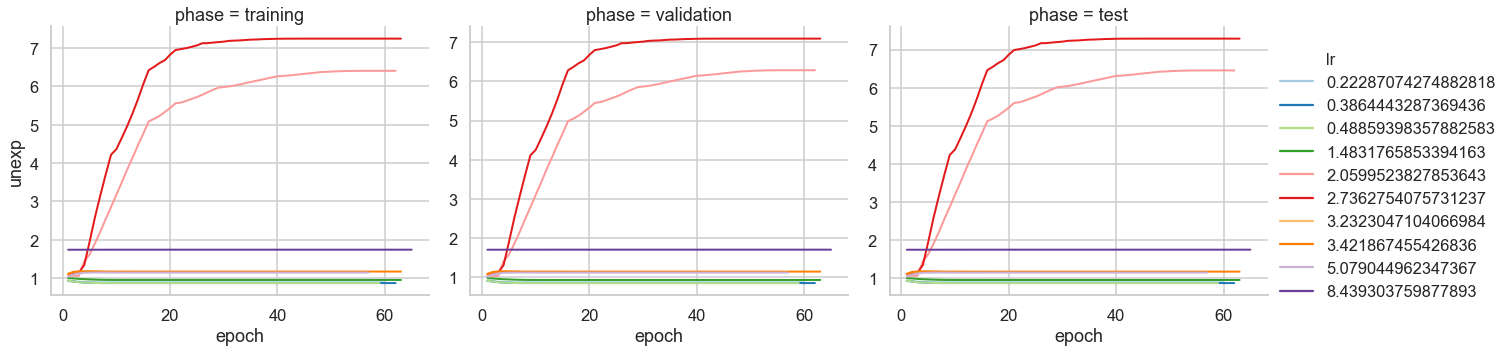

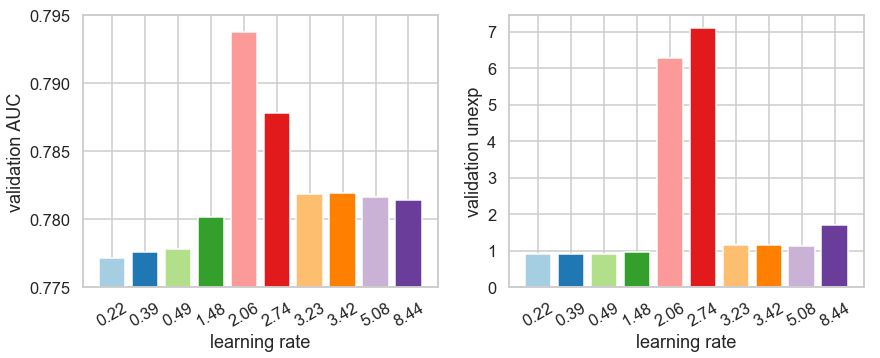

In [7]:
path = '../logs/jester_meta'
jester_table_huge, jester_val = visual_hypertuning_results(path)

10 ['../logs/jester_meta_2/1_lr_5.476066835085559', '../logs/jester_meta_2/6_lr_2.3587928339626933', '../logs/jester_meta_2/4_lr_6.6808815903016505', '../logs/jester_meta_2/5_lr_0.31910439511434985', '../logs/jester_meta_2/8_lr_0.17590469265291703', '../logs/jester_meta_2/9_lr_0.12088825479077224', '../logs/jester_meta_2/2_lr_8.510538033480783', '../logs/jester_meta_2/0_lr_3.091934850587277', '../logs/jester_meta_2/7_lr_2.4178343948792764', '../logs/jester_meta_2/3_lr_0.541925977966593']


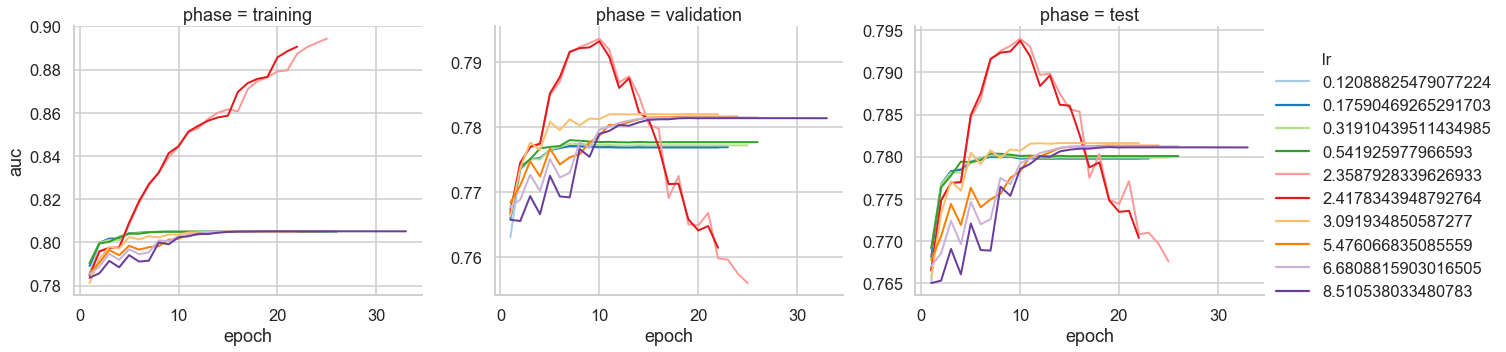

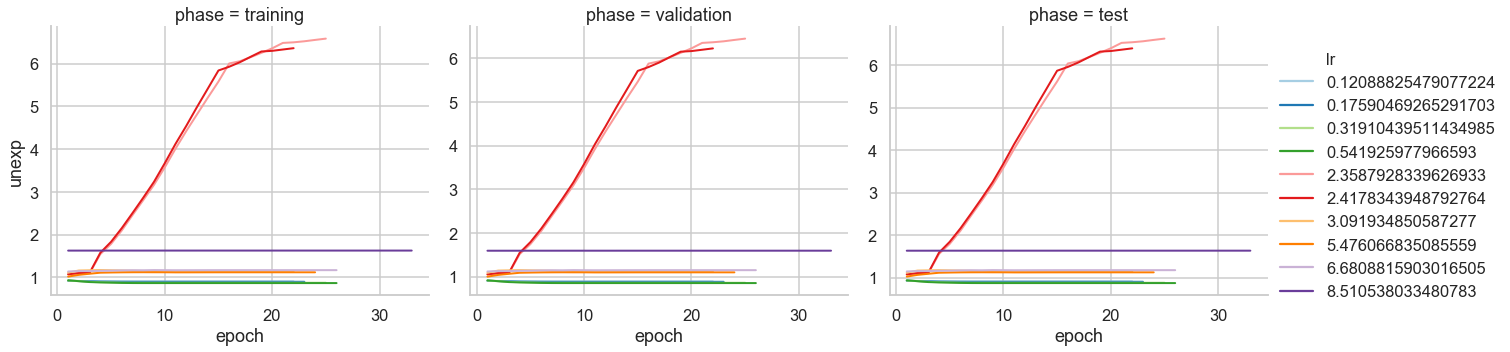

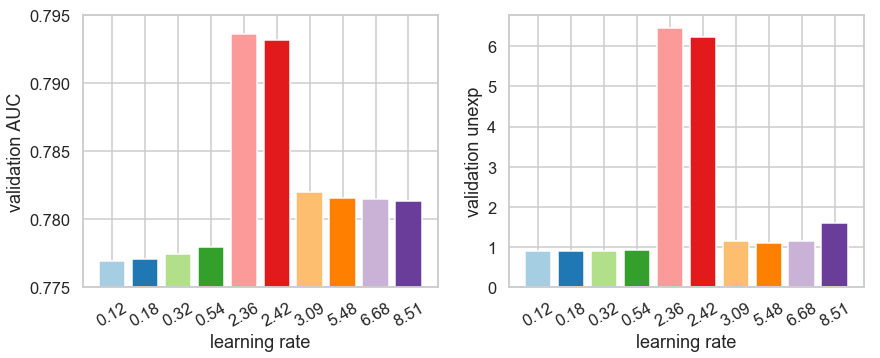

In [8]:
path = '../logs/jester_meta_2'
jester_table_huge, jester_val = visual_hypertuning_results(path)